<a href="https://colab.research.google.com/github/dgikonyo/Movie-Recommender_-2023/blob/main/Movie_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MOVIE RECOMMENDER SYSTEM
## Business Understanding
A movie streaming platform wants to revolutionize its user experience and enhance customer satisfaction. Therefore, we are tasked with creating a recommender system that accurately suggests movies to users based on user data already collected.

## Data Understanding
The data contains three columns:

1. User - This is the name of the user on the streaming site
2. Movie- Name of the movies watched by each user.
3. Ratings- Ratings of movies by users on a scale of 1-5 with 5 being the best and 1 being the worst.

## Objectives
1. Develop a model that accurately recommends movies to users based on ratings.
2. Solve the cold start problem - where a user provides little or no information.
3. Carry out exploratory data analysis:
   - Find out the most watched movies.
   - Find out movies with the highest ratings.
   - Find out user activity i.e who watched the most movies.


In [47]:
#importing necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

# installing surprise and importing some of its needed modules
!pip install surprise
from surprise import Dataset, Reader, SVD
from surprise.prediction_algorithms import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, knns, SVDpp
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

In [48]:
#Importing data.
from google.colab import drive
drive.mount('/content/drive')
movie_df=pd.read_excel('/content/drive/MyDrive/movie-data.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Reading the data


In [49]:
movie_df.head()

,User,Movie,Rating
0,Alice,Star Wars,5
1,Frank,The Godfather,4
2,Bob,Titanic,5
3,Carol,The Matrix,3
4,Dave,Inception,2


Data has three columns.

## Data Cleaning.
This section will involve dealing with missing values

In [50]:
#nature of data
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   User    58 non-null     object
 1   Movie   58 non-null     object
 2   Rating  55 non-null     object
dtypes: object(3)
memory usage: 1.5+ KB


## Removing characters from data


In [51]:
df1= movie_df.replace(['Five','5y','5x'],'5')
df_movie= df1.replace(['2?'],['2'])
df_movie


,User,Movie,Rating
0,Alice,Star Wars,5
1,Frank,The Godfather,4
2,Bob,Titanic,5
3,Carol,The Matrix,3
4,Dave,Inception,2
5,Emily,Pulp Fiction,4
6,Quincy,Star Wars,5
7,Bob,Star Wars,2
8,Frank,Forrest Gump,3
9,Alice,The Matrix,4


In [52]:
df= df_movie.replace(['x'],'NaN')
df

,User,Movie,Rating
0,Alice,Star Wars,5
1,Frank,The Godfather,4
2,Bob,Titanic,5
3,Carol,The Matrix,3
4,Dave,Inception,2
5,Emily,Pulp Fiction,4
6,Quincy,Star Wars,5
7,Bob,Star Wars,2
8,Frank,Forrest Gump,3
9,Alice,The Matrix,4


In [53]:
# Changing the ratings column to float
df['Rating']=df['Rating'].astype(float)
df

,User,Movie,Rating
0,Alice,Star Wars,5.0
1,Frank,The Godfather,4.0
2,Bob,Titanic,5.0
3,Carol,The Matrix,3.0
4,Dave,Inception,2.0
5,Emily,Pulp Fiction,4.0
6,Quincy,Star Wars,5.0
7,Bob,Star Wars,2.0
8,Frank,Forrest Gump,3.0
9,Alice,The Matrix,4.0


'User' and 'Movie' columns do not contain any missing values however 'Rating' does.

## Dealing with missing values.

We will fill the missing values with 0 as no ratings were provided for those movies.


In [54]:
df['Rating'].fillna(0, inplace=True)

In [55]:
#Cleaning the Movie column.
#Changing Matrix to The Matrix
df_Movie= df.replace(['Matrix'],'The Matrix')
df_Movie

,User,Movie,Rating
0,Alice,Star Wars,5.0
1,Frank,The Godfather,4.0
2,Bob,Titanic,5.0
3,Carol,The Matrix,3.0
4,Dave,Inception,2.0
5,Emily,Pulp Fiction,4.0
6,Quincy,Star Wars,5.0
7,Bob,Star Wars,2.0
8,Frank,Forrest Gump,3.0
9,Alice,The Matrix,4.0


## Exploratory Data Analysis

Questions that EDA will answer:

1. Highest rated movies
2. Most Active Users-
3. Popular movies- number of times a movie is watched


### User Activity

Under this section we will check for the number of movies watched per user.

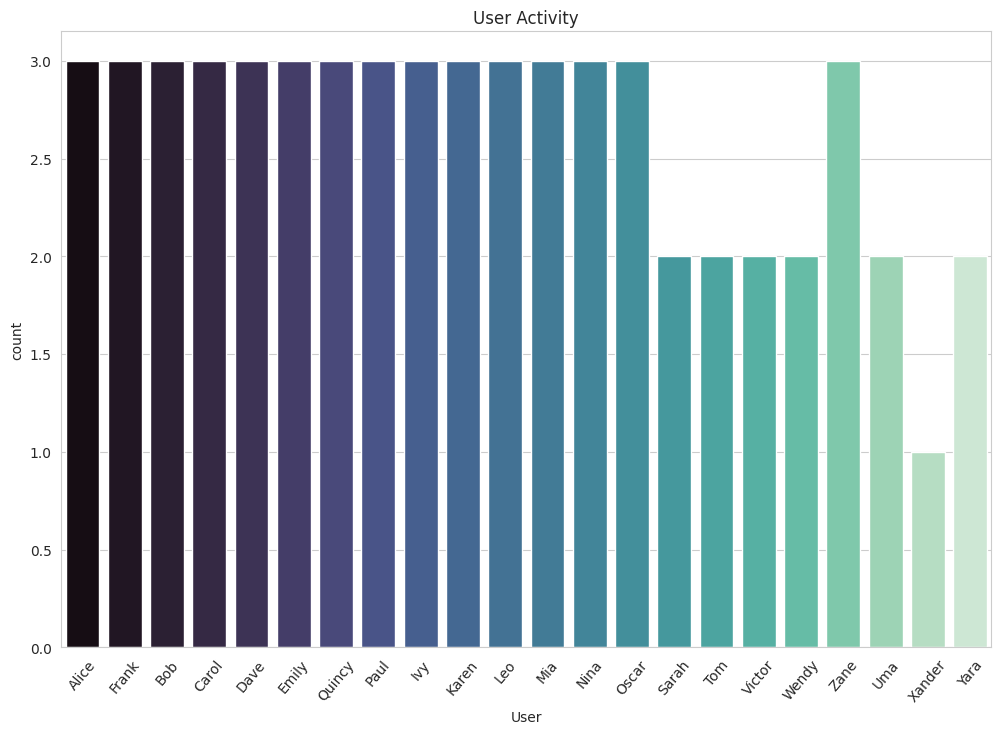

In [56]:
#Plotting a graph on user activity.
plt.figure(figsize=(12,8))
sns.countplot(x = df_Movie.User, palette='mako')
plt.xticks(rotation=50)
plt.title('User Activity')
plt.show()

The most active users have watched 3 movies.
The least active user has watched 1 movie (Xander)


### Movie Popularity

We will rate movie popularity based on the number of users who have watched a specific movie.

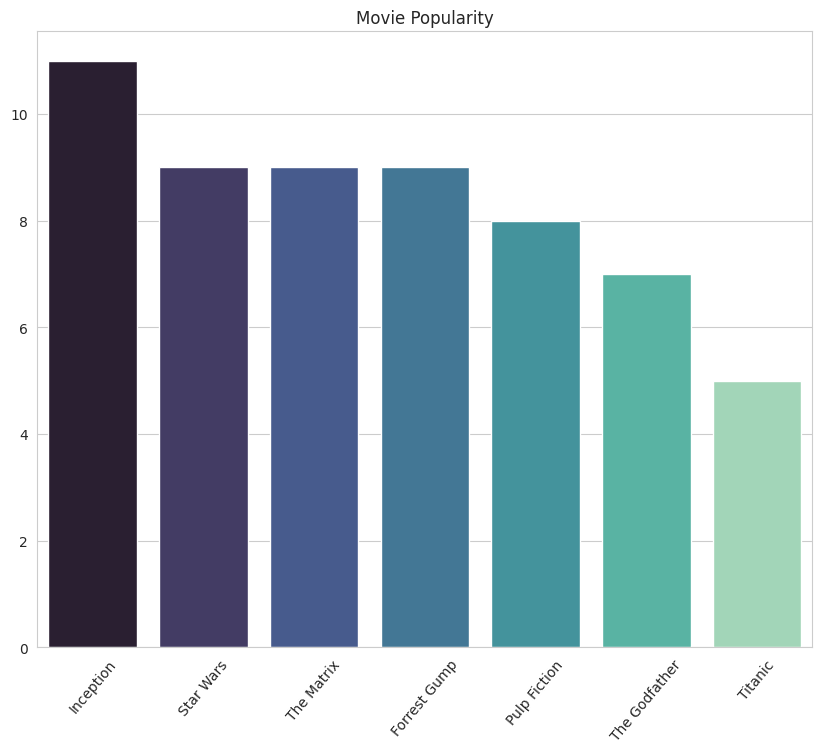

In [57]:
s = df_Movie['Movie'].value_counts(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x = s.index,y=s.values, palette='mako')
plt.xticks(rotation=50)
plt.title('Movie Popularity')
plt.show()

The most popular movie is inception while the least watched movie is Titanic.

### Movie Ratings
We will visualize the counts of the ratings so as to guage the distribution
We will plot a graph to compare avarage ratings of each movie so as to deduce the highest rated movie.


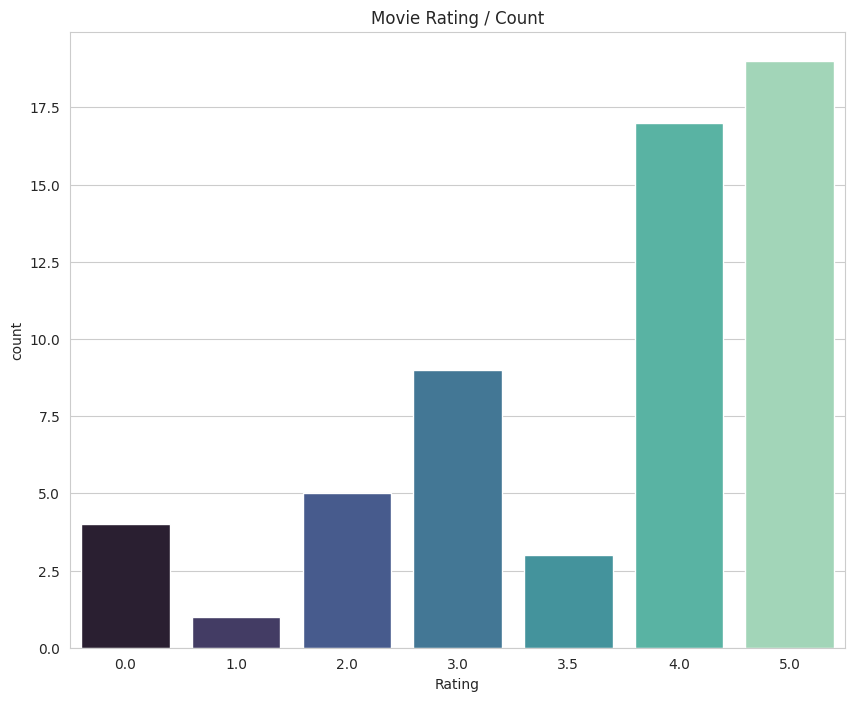

In [58]:
# Ratings count plot
plt.figure(figsize=(10,8))
sns.countplot(x=df_Movie['Rating'], palette='mako')
plt.title('Movie Rating / Count');
plt.show()

From the above visualization it is evident that rating is on a scale of 1 to 5 with 1 being the worst and 5 being the best.

We can deduce that most movies have been highly rated at 4 and 5.

The movies that fall under category zero are cases where a user did not provide any ratings.

In [59]:
#Finding the highest rated movie.
mean_rating = df_Movie.groupby('Movie').Rating.mean().rename('mean rating')
rating_mean = pd.DataFrame({'Movie': mean_rating.index, 'mean rating': mean_rating.values})
rating_mean

,Movie,mean rating
0,Forrest Gump,3.944444
1,Inception,3.000000
2,Pulp Fiction,3.812500
3,Star Wars,4.222222
4,The Godfather,3.857143
5,The Matrix,2.833333
6,Titanic,4.400000


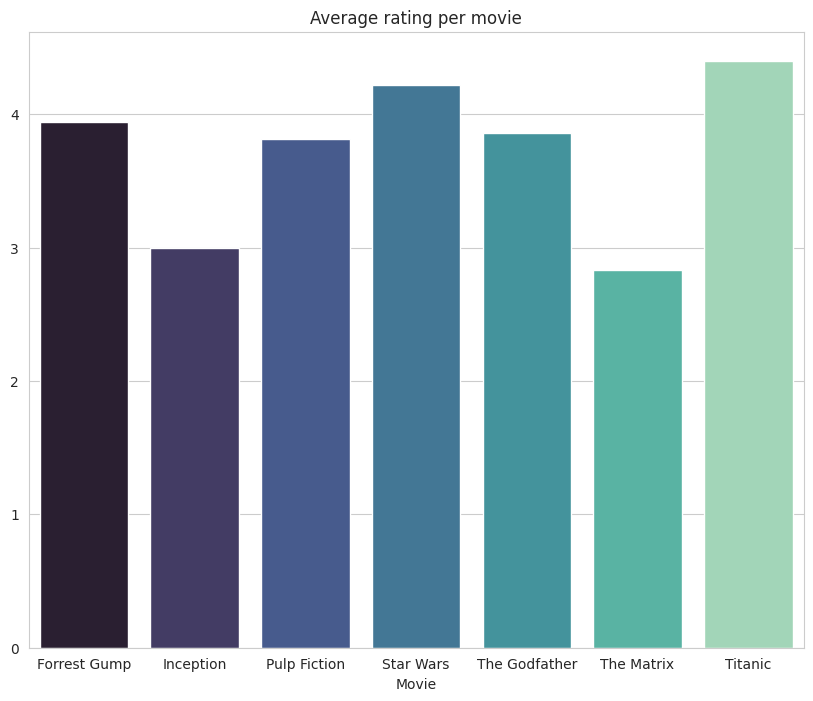

In [60]:
z = rating_mean['mean rating'].value_counts(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x= rating_mean['Movie'], y=z.index, palette='mako')
plt.title('Average rating per movie');
plt.show()

# Modelling

1. **Naive recommender**: Deals with situations where the user provides little or no information (cold start problem)

## Naive Recommender

Naive Recommendation Engine will make use of the overall Ratings and genres in order to make movie recommendtions. This would be helpful especially when resolving Cold-start problem.

Cold-start problem occurs when the system encounters new visitors to a website, with no browsing history or known preferences. creating a personalized experience for them becomes a challenge because the data normally used for generating recommendations is missing.

---



 ### Solution

For the first model we will recommend the top 3 most popular movies. i.e Movies with the most number of ratings that are highly rated.

Recommend the top 3 movies that are highly rated and have are most views.

In [61]:
total_views = df_Movie.groupby('Movie').Movie.count().rename('Views')
ratings = pd.DataFrame({'Movie': total_views.index, 'Number of Views': total_views.values})

#merge
df_rating = pd.merge(rating_mean, ratings, on ='Movie')
df_rating

,Movie,mean rating,Number of Views
0,Forrest Gump,3.944444,9
1,Inception,3.000000,11
2,Pulp Fiction,3.812500,8
3,Star Wars,4.222222,9
4,The Godfather,3.857143,7
5,The Matrix,2.833333,9
6,Titanic,4.400000,5


In [62]:
df_rating.sort_values(by=['mean rating'], ascending=False)

,Movie,mean rating,Number of Views
6,Titanic,4.400000,5
3,Star Wars,4.222222,9
0,Forrest Gump,3.944444,9
4,The Godfather,3.857143,7
2,Pulp Fiction,3.812500,8
1,Inception,3.000000,11
5,The Matrix,2.833333,9


The above dataFrame does not provide very useful information the recomender since some movies might have only been rated by one user thus its average rating being 5. We have to also consider movies that have a higher average rating that have been rated by many users.

In the cell below we will analyse top X highly rated movies that have been rated by X users X num of ratings

In [63]:
# function to recommend top 3 movies to customer based on ratings
def recommender(threshold, df):
  res = df.sort_values(by=['mean rating'], ascending=False)
  return res[0:3]

In [64]:
# Define the top 3 movies from list provided
threshold = 3
recom = recommender(threshold, df_rating)
recom

,Movie,mean rating,Number of Views
6,Titanic,4.400000,5
3,Star Wars,4.222222,9
0,Forrest Gump,3.944444,9


# Content Based Recommender

A content based recommender works with data that the user provides, either explicitly rating or implicitly clicking on a link. Based on that data, a user profile is generated, which is then used to make suggestions to the user. As the user provides more inputs or takes actions on the recommendations, the engine becomes more and more accurate.

1. Recommendation according to user rating
2. Recommendation according to movie

- Build content recommender
- Apriori Model
- Surprise Library (KNN)

* For this second Recommender Engine we will use correlation between the ratings assigned to different movies,in order to find the similarity between the movies.

In [65]:
movie_matrix = df_Movie.pivot_table(index='User', columns = 'Movie', values ='Rating')
movie_matrix

Movie,Forrest Gump,Inception,Pulp Fiction,Star Wars,The Godfather,The Matrix,Titanic
User,,,,,,,
Alice,NaN,3.0,NaN,5.0,NaN,4.0,NaN
Bob,NaN,NaN,NaN,2.0,4.0,NaN,5.0
Carol,NaN,5.0,4.0,NaN,NaN,3.0,NaN
Dave,5.0,2.0,NaN,NaN,NaN,NaN,4.0
Emily,3.0,NaN,4.0,NaN,5.0,NaN,NaN
Frank,3.0,NaN,NaN,5.0,4.0,NaN,NaN
Ivy,NaN,3.0,NaN,5.0,NaN,4.0,NaN
Karen,NaN,5.0,4.0,NaN,NaN,3.0,NaN
Leo,5.0,2.0,NaN,NaN,NaN,NaN,4.0


We will choose Inception to use as an example. Imagine a user who has watched  Inception movie and wants to be recommeneded a new movie to watch that is similar to Inception.


First we find the ratings for Inception movie from the matrix created before


In [66]:
movie_name  = 'Inception'
matrix_user_ratings = movie_matrix[movie_name]
matrix_user_ratings.head()

User
Alice    3.0
Bob      NaN
Carol    5.0
Dave     2.0
Emily    NaN
Name: Inception, dtype: float64

We then used the corrwith method in pandas to find movies that are similar to the matrix movie based on the user ratigs

In [67]:
# using correlation to find movies similar to the matrix
similar_to_matrix = movie_matrix.corrwith(matrix_user_ratings)
corr_matrix =  pd.DataFrame(similar_to_matrix, columns=['Correlation'])
#drop null values from the dataframe
corr_matrix.dropna(inplace=True)
corr_matrix.head()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,Correlation
Movie,
Inception,1.000000
Pulp Fiction,-1.000000
The Matrix,-0.707107


In [68]:
#sort the values based on correlation with the matrix movie
corr_matrix.sort_values('Correlation',ascending = False).head()

,Correlation
Movie,
Inception,1.000000
The Matrix,-0.707107
Pulp Fiction,-1.000000


Conclusion: This is not a robust model.
Reason: Small dataset thus, the model may have produced poor results

# Implementing a Recommendation Engine using surprise library

In [69]:
# reading values as a surprise dataset
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(df_Movie, reader)

# genreating a trainset
dataset = data.build_full_trainset()
print('Number of users:', dataset.n_users, '\n')
print('Number of items:', dataset.n_items)

Number of users: 22 

Number of items: 7


In [70]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose= False)

    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


<ipython-input-70-066d5b99003d>:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
<ipython-input-70-066d5b99003d>:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
<ipython-input-70-066d5b99003d>:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
<ipython-input-70-066d5b99003d>:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([

,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
KNNBasic,1.198992,0.796119,0.002369,0.000234
SVD,1.428002,1.125447,0.001328,0.000203
KNNBaseline,1.437734,1.000898,0.001611,0.000218
KNNWithMeans,1.710988,1.179197,0.001396,0.000232
KNNWithZScore,1.817622,1.373175,0.001850,0.000227


## Apriori Algorithm

Apriori algorithm refers to the algorithm which is used to calculate the association rules between objects.

It means how two or more objects are related to one another. In other words, we can say that the apriori algorithm is an association rule leaning that analyzes that people who bought product A also bought product B

In [71]:
# analysing correlation with similar movies
# get the all users and their ratings for a specific movie
movie_matrix = df_Movie.pivot_table(index='User', columns = 'Movie', values ='Rating')
movie_matrix

Movie,Forrest Gump,Inception,Pulp Fiction,Star Wars,The Godfather,The Matrix,Titanic
User,,,,,,,
Alice,NaN,3.0,NaN,5.0,NaN,4.0,NaN
Bob,NaN,NaN,NaN,2.0,4.0,NaN,5.0
Carol,NaN,5.0,4.0,NaN,NaN,3.0,NaN
Dave,5.0,2.0,NaN,NaN,NaN,NaN,4.0
Emily,3.0,NaN,4.0,NaN,5.0,NaN,NaN
Frank,3.0,NaN,NaN,5.0,4.0,NaN,NaN
Ivy,NaN,3.0,NaN,5.0,NaN,4.0,NaN
Karen,NaN,5.0,4.0,NaN,NaN,3.0,NaN
Leo,5.0,2.0,NaN,NaN,NaN,NaN,4.0


In [72]:
star_wars_ratings = movie_matrix['Star Wars']
inception_ratings = movie_matrix['Inception']

star_wars_ratings

User
Alice     5.0
Bob       2.0
Carol     NaN
Dave      NaN
Emily     NaN
Frank     5.0
Ivy       5.0
Karen     NaN
Leo       NaN
Mia       NaN
Nina      5.0
Oscar     NaN
Paul      NaN
Quincy    5.0
Sarah     5.0
Tom       NaN
Uma       2.0
Victor    NaN
Wendy     NaN
Xander    NaN
Yara      NaN
Zane      4.0
Name: Star Wars, dtype: float64

In [73]:
# analysing correlation with similar movies
similar_to_starwars = movie_matrix.corrwith(star_wars_ratings)
similar_to_inception = movie_matrix.corrwith(inception_ratings)

corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation'])
corr_starwars.dropna(inplace = True)
corr_starwars.head()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,Correlation
Movie,
Forrest Gump,-1.0
Star Wars,1.0
